In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
%matplotlib inline

In [158]:
complaints = pd.read_csv("Consumer_Complaints.csv", dtype={'ZIP code': object,
                                                           'Sub-issue': object})

In [159]:
complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,01474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [53]:
complaints = complaints.rename(columns=lambda x: x.replace(' ', '_'))

In [54]:
complaints.head()

,Complaint_ID,Product,Sub-product,Issue,Sub-issue,State,ZIP_code,Submitted_via,Date_received,Date_sent_to_company,Company,Company_response,Timely_response?,Consumer_disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [55]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395853 entries, 0 to 395852
Data columns (total 14 columns):
Complaint_ID            395853 non-null int64
Product                 395853 non-null object
Sub-product             271830 non-null object
Issue                   395847 non-null object
Sub-issue               122938 non-null object
State                   390362 non-null object
ZIP_code                391368 non-null float64
Submitted_via           395853 non-null object
Date_received           395853 non-null object
Date_sent_to_company    395853 non-null object
Company                 395853 non-null object
Company_response        395853 non-null object
Timely_response?        395853 non-null object
Consumer_disputed?      364266 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 45.3+ MB


In [56]:
complaints.index = pd.to_datetime(complaints.pop('Date_received'), format="%m/%d/%Y")

In [57]:
complaints.head()

,Complaint_ID,Product,Sub-product,Issue,Sub-issue,State,ZIP_code,Submitted_via,Date_sent_to_company,Company,Company_response,Timely_response?,Consumer_disputed?
Date_received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,NaN
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [59]:
complaints_data = complaints[['Product', 'Sub-product', 'State', 'ZIP_code', 'Company', \
                             'Company_response', 'Timely_response?']]

In [60]:
complaints_data.head()

,Product,Sub-product,State,ZIP_code,Company,Company_response,Timely_response?
Date_received,,,,,,,
2015-05-22,Mortgage,Conventional adjustable mortgage (ARM),VA,22204,"Green Tree Servicing, LLC",Closed with explanation,Yes
2015-05-22,Consumer loan,Vehicle loan,MO,63304,Ally Financial Inc.,In progress,Yes
2015-05-22,Consumer loan,Vehicle lease,FL,33414,Ally Financial Inc.,In progress,Yes
2015-05-22,Mortgage,Conventional fixed mortgage,NC,27615,Navy FCU,In progress,Yes
2015-05-22,Consumer loan,Installment loan,MA,1474,Santander Bank US,In progress,Yes


In [67]:
product = complaints_data.groupby("Product")

In [68]:
product.head()

,Product,Sub-product,State,ZIP_code,Company,Company_response,Timely_response?
Date_received,,,,,,,
2015-05-22,Mortgage,Conventional adjustable mortgage (ARM),VA,22204,"Green Tree Servicing, LLC",Closed with explanation,Yes
2015-05-22,Consumer loan,Vehicle loan,MO,63304,Ally Financial Inc.,In progress,Yes
2015-05-22,Consumer loan,Vehicle lease,FL,33414,Ally Financial Inc.,In progress,Yes
2015-05-22,Mortgage,Conventional fixed mortgage,NC,27615,Navy FCU,In progress,Yes
2015-05-22,Consumer loan,Installment loan,MA,1474,Santander Bank US,In progress,Yes
2015-05-22,Debt collection,Medical,KY,41522,"GLA Collection Company, Inc.",Closed with explanation,Yes
2015-05-22,Debt collection,Medical,IL,62684,Transworld Systems Inc.,In progress,Yes
2015-05-22,Debt collection,"Other (phone, health club, etc.)",DC,20005,"PDQ Services, Inc.",Closed with explanation,Yes
2015-05-21,Debt collection,"Other (phone, health club, etc.)",TX,78233,"I.C. System, Inc.",Closed with explanation,Yes


In [93]:
count_by_month = complaints_data.Product.resample("M", how=["count"])

In [96]:
plot_count_month = count_by_month[:-1]

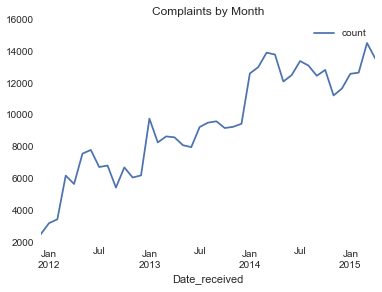

In [97]:
plot_count_month.plot(kind="line", title="Complaints by Month")

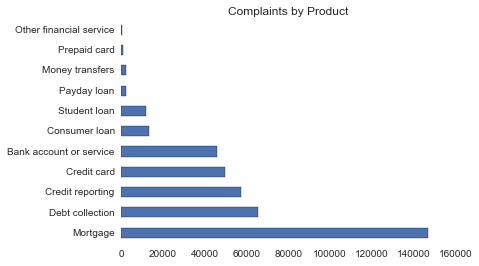

In [104]:
complaints_data.Product.value_counts().plot(kind = "barh", title="Complaints by Product")

In [110]:
company_count = complaints_data.Company.value_counts()

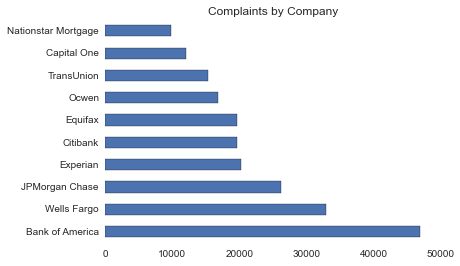

In [113]:
company_count[0:10].plot(kind="barh", title= "Complaints by Company")

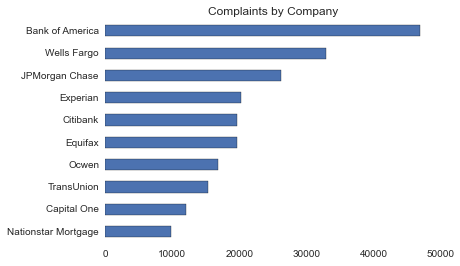

In [161]:
company_count[9::-1].plot(kind="barh", title= "Complaints by Company")

In [116]:
company_response = complaints_data.Company_response.value_counts()

In [120]:
company_response

Closed with explanation            279287
Closed with non-monetary relief     50502
Closed with monetary relief         28145
Closed without relief               17909
Closed                               9599
Closed with relief                   5305
In progress                          3222
Untimely response                    1884
dtype: int64

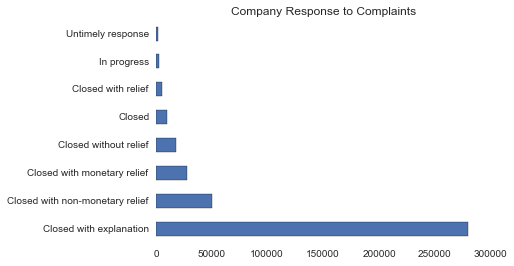

In [118]:
company_response.plot(kind="barh", title="Company Response to Complaints")

In [122]:
complaints_data["day_of_week"] = complaints_data.index.to_series().map(lambda d: d.weekday())

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [125]:
day_data = complaints_data.day_of_week.value_counts().sort_index()

In [126]:
dow = ["M", "Tu", "W", "Th", "F", "Sa", "Su"]

In [127]:
day_data.index = dow

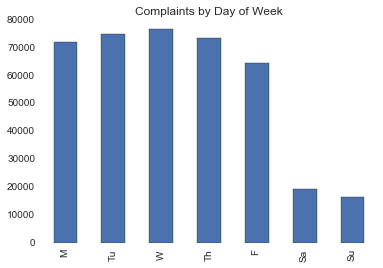

In [130]:
day_data.plot(kind="bar", title="Complaints by Day of Week")

In [137]:
data_by_day = complaints_data.Product.resample("D", how=["count"])

In [139]:
data_by_day["day_of_week"] = data_by_day.index.to_series().map(lambda d: d.weekday())

In [140]:
data_by_day.head()

,count,day_of_week
Date_received,,
2011-12-01,136,3
2011-12-02,130,4
2011-12-03,25,5
2011-12-04,25,6
2011-12-05,183,0


In [143]:
new_data_by_day = data_by_day.groupby("day_of_week").mean()

In [144]:
new_data_by_day

,count
day_of_week,
0,396.204420
1,412.082873
2,422.933702
3,402.219780
4,353.186813
5,106.154696
6,90.077348


In [145]:
new_data_by_day.index = dow

In [146]:
new_data_by_day

,count
M,396.204420
Tu,412.082873
W,422.933702
Th,402.219780
F,353.186813
Sa,106.154696
Su,90.077348


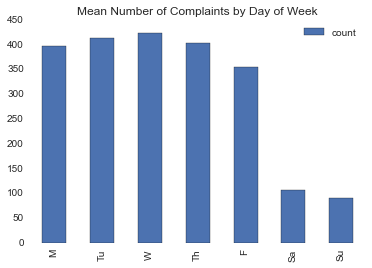

In [147]:
new_data_by_day.plot(kind="bar", title="Mean Number of Complaints by Day of Week")

In [149]:
state_data = complaints_data.State.value_counts().sort_index()

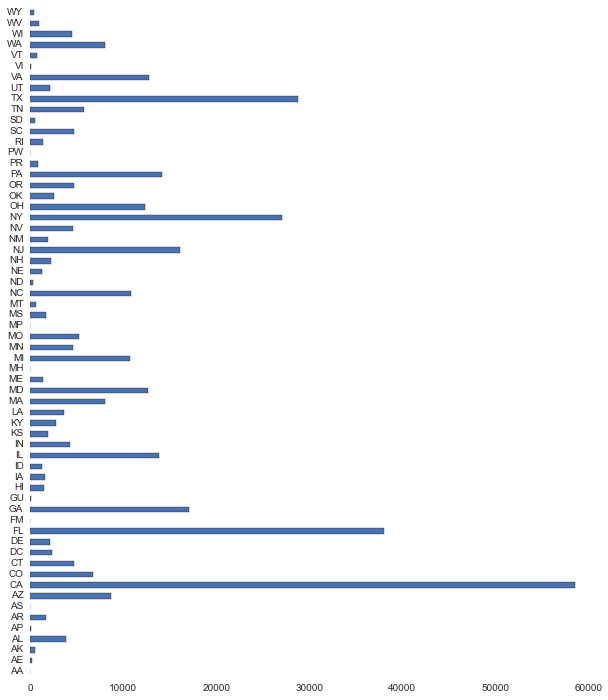

In [165]:
plt.figure(figsize=(10, 12))
state_data.plot(kind='barh')

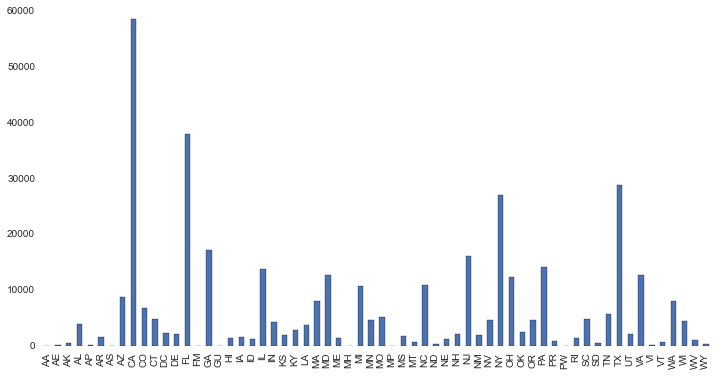

In [167]:
plt.figure(figsize=(12, 6))
state_data.plot(kind='bar')

In [173]:
census = pd.read_csv("NST-EST2014-01.csv", header=3)
census.head(10)

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014
0,United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
1,Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
2,Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
3,South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
4,West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"
5,.Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
6,.Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
7,.Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
8,.Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
9,.California,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [174]:
states = census[5:]
states.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014
5,.Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
6,.Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
7,.Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
8,.Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
9,.California,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [175]:
states

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014
5,.Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
6,.Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
7,.Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
8,.Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
9,.California,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"
10,.Colorado,"5,029,196","5,029,324","5,048,575","5,119,661","5,191,709","5,272,086","5,355,866"
11,.Connecticut,"3,574,097","3,574,096","3,579,345","3,590,537","3,594,362","3,599,341","3,596,677"
12,.Delaware,"897,934","897,936","899,731","907,829","916,881","925,240","935,614"
13,.District of Columbia,"601,723","601,767","605,210","620,427","635,040","649,111","658,893"
14,.Florida,"18,801,310","18,804,623","18,852,220","19,107,900","19,355,257","19,600,311","19,893,297"


In [180]:
states = states.dropna()

In [181]:
states = states.rename(columns={"Unnamed: 0": "State"})

In [184]:
states.State = states.State.map(lambda name: name[1:] if name.startswith(".") else name)

In [185]:
states.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014
5,Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
6,Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
7,Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
8,Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
9,California,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [186]:
state_abbr = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [187]:
state_to_abbr = {value: key for key, value in state_abbr.items()}

In [188]:
state_to_abbr

{'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'National': 'NA',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 

In [192]:
states.State = states.State.map(state_to_abbr)

In [193]:
states.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014
5,AL,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
6,AK,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
7,AZ,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
8,AR,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
9,CA,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [196]:
states.index = states.State

In [197]:
states.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,,
AL,AL,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
AK,AK,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
AZ,AZ,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
AR,AR,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
CA,CA,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [198]:
states_2014 = states['2014']

In [199]:
states_2014.head()

State
AL     4,849,377
AK       736,732
AZ     6,731,484
AR     2,966,369
CA    38,802,500
Name: 2014, dtype: object

In [200]:
state_data.head()

AA      10
AE     147
AK     478
AL    3842
AP     113
dtype: int64

In [201]:
state_data.join(states_2014)

AttributeError: 'Series' object has no attribute 'join'

In [206]:
state_data = state_data.to_frame(name="complaints")

In [207]:
states_2014 = states_2014.to_frame(name="population")

In [209]:
state_data = state_data.join(states_2014)

In [211]:
state_data = state_data.dropna()

In [212]:
state_data.head()

,complaints,population
AK,478,"736,732"
AL,3842,"4,849,377"
AR,1670,"2,966,369"
AZ,8678,"6,731,484"
CA,58603,"38,802,500"


In [213]:
state_data['per_capita'] = state_data.complaints / state_data.population * 10000 

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [214]:
int('2,138')

ValueError: invalid literal for int() with base 10: '2,138'

In [215]:
# http://stackoverflow.com/questions/1779288/how-do-i-use-python-to-convert-a-string-to-a-number-if-it-has-commas-in-it-as-th
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') 

'en_US.UTF-8'

In [216]:
state_data.population = state_data.population.map(locale.atoi)

In [217]:
state_data.head()

,complaints,population
AK,478,736732
AL,3842,4849377
AR,1670,2966369
AZ,8678,6731484
CA,58603,38802500


In [218]:
state_data['per_capita'] = state_data.complaints / state_data.population * 10000 

In [219]:
state_data.head()

,complaints,population,per_capita
AK,478,736732,6.488112
AL,3842,4849377,7.922667
AR,1670,2966369,5.629778
AZ,8678,6731484,12.891660
CA,58603,38802500,15.102893


In [ ]:
com

In [220]:
state_data_per_cap = state_data['per_capita']

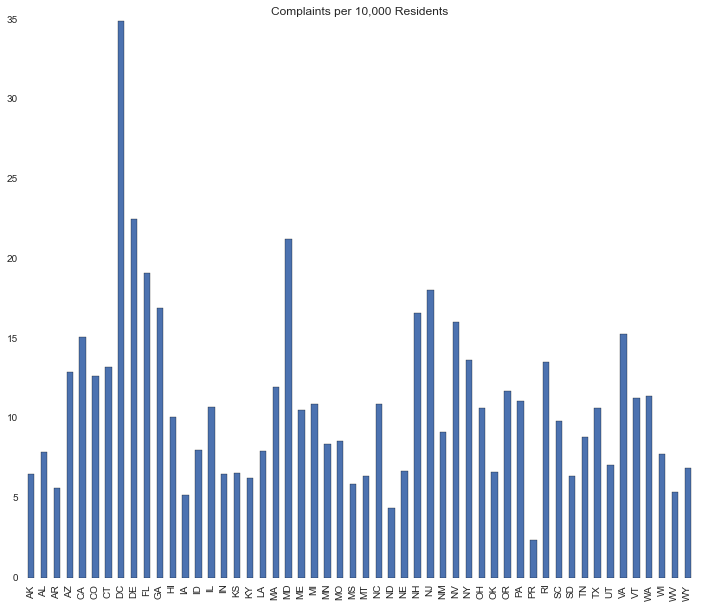

In [223]:
plt.figure(figsize=(12, 10))
state_data_per_cap.plot(kind='bar', title="Complaints per 10,000 Residents")

ImportError: No module named 'mpl_toolkits.basemap'

In [258]:
zip_data = complaints_data.ZIP_code.value_counts().sort_index()

In [259]:
zip_data

1         1
2         1
5         1
8         1
9         1
10       10
11        6
12        2
14        2
17        2
18        1
19        1
20        5
22        2
23        1
24        3
26        1
29        1
32        1
39        1
41        1
43        2
49        1
51        1
52        1
54        1
55        1
59        1
60        1
61        1
         ..
99701     7
99703     6
99705    10
99708     5
99709    12
99712     9
99714     1
99723     1
99727     1
99731     1
99752     2
99755     1
99762     3
99776     1
99778     1
99780     1
99801    23
99802     3
99803     3
99804     1
99821     1
99826     1
99827     2
99833     1
99835     4
99841     1
99901     7
99925     1
99926     1
99999    17
dtype: int64

In [260]:
zips = pd.read_csv("2010+Census+Population+By+Zipcode+(ZCTA).csv")

In [261]:
zips = zips.rename(columns=lambda x: x.replace(' ', '_'))
zips.head()


,Zip_Code_ZCTA,2010_Census_Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [262]:
zips.index = zips.Zip_Code_ZCTA

In [265]:
zips.head()

,Zip_Code_ZCTA,2010_Census_Population
Zip_Code_ZCTA,,
1001,1001,16769
1002,1002,29049
1003,1003,10372
1005,1005,5079
1007,1007,14649


In [266]:
zips = zips.rename(columns=lambda x: x.replace('2010_', ''))

In [268]:
zips = zips.Census_Population
zips.head()

Zip_Code_ZCTA
1001    16769
1002    29049
1003    10372
1005     5079
1007    14649
Name: Census_Population, dtype: int64

In [272]:
zips.head()

,population
Zip_Code_ZCTA,
1001,16769
1002,29049
1003,10372
1005,5079
1007,14649


In [274]:
zip_data.head()

,complaints
1,1
2,1
5,1
8,1
9,1


In [275]:
zips_combined = zips.join(zip_data)

In [276]:
zips_combined.head()

,population,complaints
1001,16769,13
1002,29049,17
1003,10372,NaN
1005,5079,4
1007,14649,18


In [277]:
zips_combined = zips_combined.dropna()

In [278]:
zips_combined.head()

,population,complaints
1001,16769,13
1002,29049,17
1005,5079,4
1007,14649,18
1008,1263,1


In [281]:
zips_combined["per_capita"] = zips_combined.complaints / zips_combined.population

In [282]:
zips_combined.head()

,population,complaints,per_capita
1001,16769,13,0.000775
1002,29049,17,0.000585
1005,5079,4,0.000788
1007,14649,18,0.001229
1008,1263,1,0.000792


find mean, find stdev of per_capita

inf